# WEEK2: Resampling Methods

# Objective

This homework sheet will help reviewing the basic concepts associated with model selection and regularization. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

**Questions**

 This homework is divided into two main parts. First, a conceptual component will review the basic concepts related to resampling. The second part of the homework is mostly intended to be a brief introduction to regularization methods and resampling in python . Several of these questions are modified from James et al. (2021).

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| Q1a    | 1     |
| Q1b    | 0.50      |
| Q1c   | 1      |
| Q1d     | 0.50      |
| Q1e     | 0.50     |
| Q1f    | 0.50    |
| Q2a    | 1     |
| Q2b    | 1      |
| Q2c   | 1      |
| Q2d     | 1      |
| Q3a   | 1    |
| Q3b     | 1      |
| Q4     | 1      |
| Q5a    | 1    |
| Q5b    | 1     |
| Q5c   | 1     |
| Q5d     | 1      |

# Conceptual

##  Q1. We will derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of `n` observations. **Please note that samples are obtained with replacement**.

### a) What is the probability that the first bootstrap observation is not the $jth$ observation from the original sample? Justify your answer.

The probability that the first bootstrap observation is not the $j$th observation from the original sample is $1 - \frac{1}{n}$, where $n$ is the total number of observations in the original sample. This is because each observation in the original sample has an equal probability of $\frac{1}{n}$ of being selected as the first bootstrap observation, and the probability of not selecting the $j$th observation is $1 - \frac{1}{n}$.


### b) What is the probability that the second bootstrap observation is not the $jth$ observation from the original sample?



The probability that the second bootstrap observation is not the $j$th observation from the original sample is also $1 - \frac{1}{n}$, as each bootstrap observation is independently selected with replacement.


###  c) Argue that the probability that the $jth$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.

The probability that the $j$th observation is not in the bootstrap sample after $n$ selections is $(1 - \frac{1}{n})^n$. This can be understood by considering that for each bootstrap observation, the probability of not selecting the $j$th observation is $1 - \frac{1}{n}$. Since selections are made with replacement, the probability remains the same for each draw, and we multiply these probabilities together for all $n$ draws.

###  d) When `n = 5`, what is the probability that the $jth$ observation is in the bootstrap sample?

When $n = 5$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{5})^5 \approx 0.67232$.

### e) When `n = 100`, what is the probability that the $jth$ observation is in the bootstrap sample?

When $n = 100$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{100})^{100} \approx 0.63396765872$.

### f) When `n = 1000`, what is the probability that the $jth$ observation is in the bootstrap sample?


When $n = 1000$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{1000})^{1000} \approx 0.63230457522$.


## Q2)
The following questions are relative to k-fold cross-validation.

### a) Explain how k-fold cross-validation is implemented.


  1. **Split the dataset:** Split the dataset into $k$ equal-sized folds.
   2. **Model training and evaluation:** Iterate through each fold:
      - Use $k-1$ folds for training the model.
      - Use the remaining 1 fold for evaluating the model (validation set).
      - Calculate the evaluation metric (e.g., accuracy, error) for this fold.
   3. **Average the results:** Average the k evaluation metric results to get a single evaluation metric for the model.

### b) How would you choose the analyzed k? Does that matter?

 - **Impact of k:** The choice of k can impact the bias-variance tradeoff. Smaller values of k can lead to higher variance but lower bias in the estimated performance. Larger values of k (e.g., k=n, where n is the number of data points) can lead to lower variance but higher bias.
 - **Rule of thumb:** Common choices for k are 5 and 10 as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. It's also useful to consider computational constraints when choosing k.



### c) What are the advantages and disadvantages of k-fold cross-validation relative to: *The validation set* approach?


#### **Advantages and disadvantages relative to the validation set approach are as follows:**
##### **Advantages:**
 - More efficient use of data: k-fold CV uses all data for training and validation, unlike the validation set approach, which sets aside a portion of the data for validation only.
 - More reliable performance estimation: Since k-fold CV averages the evaluation metric over k folds, it tends to provide a more stable estimate of model performance compared to a single validation set. Validation set error rate in validation set approch may tend to overestimate the test error rate for the model fit on the entire data set. Machine learning methods tend to perform worse when trained on fewer observations and therefore averaging makes error estimate more reliable. 
##### **Disadvantages:**
 - Computationally expensive and more complicated: Performing k iterations of model training and evaluation can be computationally expensive, especially for large datasets or complex models. The validation set approach is more conceptually simple.
 - Variability in results: The choice of k can introduce variability in the estimated performance, and the results can depend on the particular splits of the data.



### d)  What are the advantages and disadvantages of k-fold cross-validation relative to: *LOOCV*?

#### **Advantages and disadvantages relative to LOOCV:**
##### **Advantages:**
 - Low variance: k-fold CV typically has lower variance compared to LOOCV because the estimates from each fold are higly correlated in LOOCV and hence LOOCV has high variance. In simple terms, LOOCV can have higher variance because the models are trained on very similar datasets (differing by only one data point), which can lead to similar errors and hence higher variance in the evaluation metric. 
 - Computational efficiency: For large datasets, k-fold CV is more computationally efficient than LOOCV since it requires training and evaluating the model k times instead of n times (where n is the number of data points).
##### **Disadvantages:**
 - Higher Bias: LOOCV tends to have less bias compared to k-fold CV. This is because each model is trained on nearly all the data, the average performance estimate tends to have lower bias compared to k-fold cross-validation, where each model is trained on a smaller subset of the data.
 - Sensitivity to outliers: LOOCV can be sensitive to outliers since each model is trained on almost all data points, including potentially influential outliers.

# Applied

We have to use college dataset to answer the questions given in the notebook

## Q3)

### a) What is the following code supposed to do?

In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 20
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for train_index, test_index in indices:
            # Fit on K-1 folds
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            # Predict on the kth fold
            x_test = data.iloc[test_index]['x']
            x_test_poly = poly.fit_transform(x_test.values.reshape(-1, 1))
            y_hat[test_index] = lin_reg.predict(x_test_poly)

        # Get the MSE estimate
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

The above code does the following 
 1. Genrate the simulated data for $ Y = X^{2} + \varepsilon $
 2. Create 20-fold Cross validation sets.
 3. We evaluvate models having varying polynomial degree from 1 to 10 for N_REPLICATES times using cross validation. For each iteration, we evaluvate MSE. 
 5. Average the MSE estimates across N_REPLICATES for all 10 models genrarated by varying degree of polynomial term. 

 ### b) To the best of your knowledge, improve the structure, content, clarity, and reproducibility of the code presented before in "part a" of this question (e.g. would you run a single or multiple replicates?). Fix any mistakes (if you find any). Finally, generate at least two plots summarizing your findings regarding the best-fitting polynomial order on the simulated dataset (also from "part a"): (1) MSE vs polynomial order, and (2) x vs y, along with a plot of the selected model.

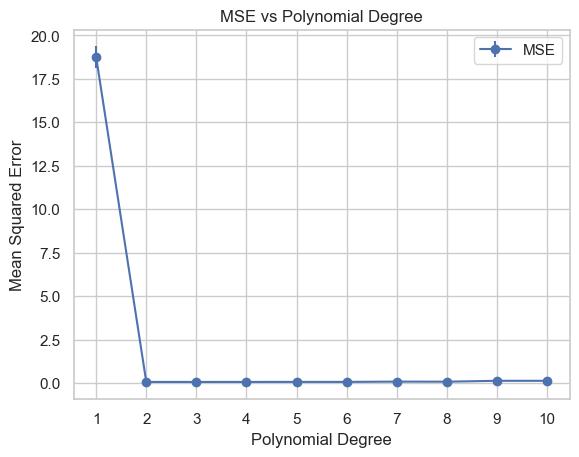

Best Polynomial Degree: 2


In [158]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 5
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Initialize an array to store MSE for each fold and each polynomial degree
mse_folds = np.zeros((N_REPLICATES, len(POLY_DEGREE), N_FOLDS))

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for fold_idx, (train_index, test_index) in enumerate(kf.split(data)):
            # print(train_index)
            # print(test_index)
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            x_test, y_test = data.iloc[test_index]['x'], data.iloc[test_index]['y']

            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            x_test_poly = poly.transform(x_test.values.reshape(-1, 1))

            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            y_hat[test_index] = lin_reg.predict(x_test_poly)
            mse_fold = np.mean((y_hat[test_index] - y_test)**2)
            mse_folds[r, q_idx, fold_idx] = mse_fold
        # print(y_hat)
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

# Plot MSE vs polynomial order
plt.errorbar(POLY_DEGREE, mse_mean, yerr=mse_std, fmt='o-', label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

# Find the best polynomial order
best_degree_idx = np.argmin(mse_mean)
best_degree = POLY_DEGREE[best_degree_idx]
print(f"Best Polynomial Degree: {best_degree}")


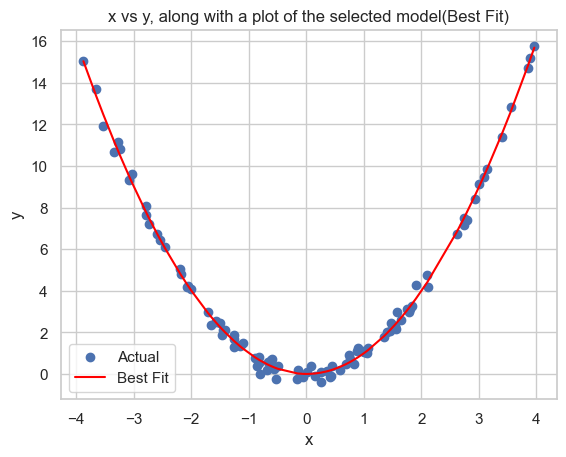

In [159]:
# Plot x vs y with the best-fitting model
plt.scatter(data['x'], data['y'], label='Actual')
poly = PolynomialFeatures(degree=best_degree)
data_sorted = data.sort_values(by='x')
x_poly = poly.fit_transform(data_sorted['x'].values.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(x_poly, data_sorted['y'])
y_pred = lin_reg.predict(x_poly)
plt.plot(data_sorted['x'], y_pred, color='red', label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y, along with a plot of the selected model(Best Fit)')
plt.legend()
plt.show()

### Other interesting Graphs 
Other intersting graphs I wanted to plot personally. 

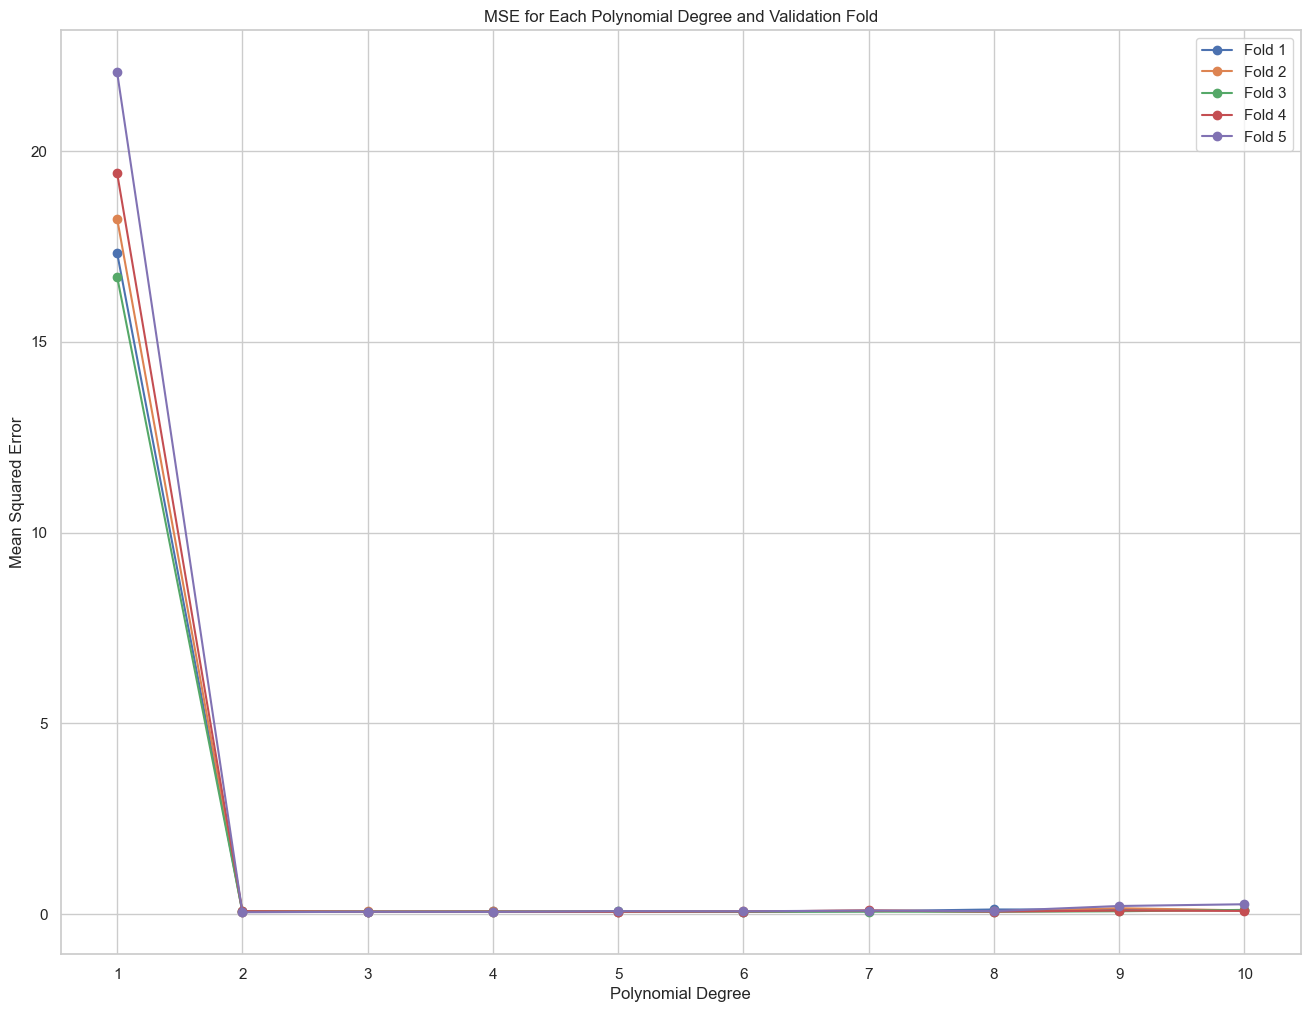

In [160]:
mse_mean_folds = np.mean(mse_folds, axis=0)
plt.figure(figsize=(16, 12))
for fold_idx in range(0, 5):
    plt.plot(POLY_DEGREE, mse_mean_folds[:, fold_idx], marker='o', label=f'Fold {fold_idx + 1}')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Polynomial Degree and Validation Fold')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

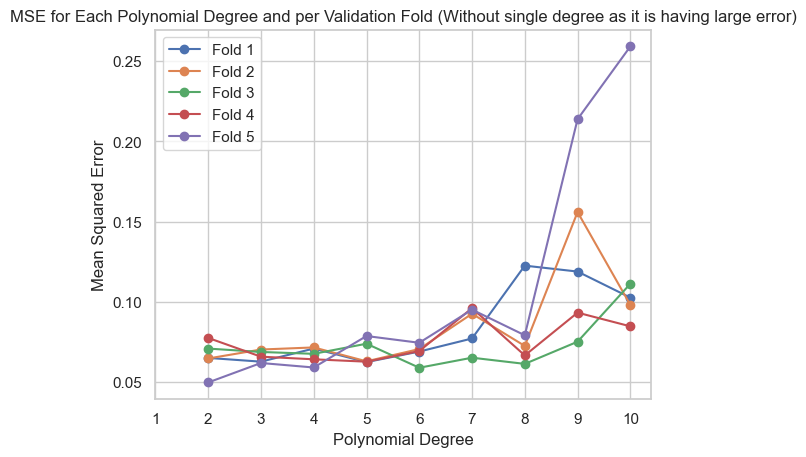

In [161]:
for fold_idx in range(0, 5):
    plt.plot(POLY_DEGREE[1:], mse_mean_folds[:, fold_idx][1:], marker='o', label=f'Fold {fold_idx + 1}')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Polynomial Degree and per Validation Fold (Without single degree as it is having large error)')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

We can clearly see how the error varation with different folds and how the average seems to increase when model overfits

## Q4) Bootstrap the following dataset (`n = 1000`) to obtain median and 95% CI (Confidence interval)for parameter estimates (slope and intercept) summarizing the relationship between `x` and `y_measured.` What happens with median parameter estimates when you examine `y` instead?

In [186]:
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats
from sklearn.utils import resample

rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
y_measured = y + rng.normal(size=nobs)

# BEGIN SOLUTION
data_measured = pd.DataFrame({'x': x, 'y': y_measured})
data_no_error = pd.DataFrame({'x': x, 'y': y})

B = 1000
def find_bootstrap_estimate(data, B=1000, confidence=95):
    nobs  = df.shape[0]
    bootstrap_slopes = np.zeros(B, dtype=np.float64)
    bootstrap_intercepts = np.zeros(B, dtype=np.float64)

    mse_estimates = pd.DataFrame({
        "slope_x_square" : np.zeros(B),
        "slope_x" : np.zeros(B),
        "intercept" : np.zeros(B),
        "mse_test": np.zeros(B)
    })
    for i in range(B):
        train_data = resample(data, n_samples=nobs, random_state=i)
        not_included_indices = data.index.difference(train_data.index)
        test_data = data.loc[not_included_indices]
        
        poly = PolynomialFeatures(degree=2)
        x_train_poly = poly.fit_transform(train_data['x'].values.reshape(-1, 1))
        x_test_poly = poly.transform(test_data['x'].values.reshape(-1, 1))

        lin_reg = LinearRegression()
        lin_reg.fit(x_train_poly, train_data['y'])

        y_hat = lin_reg.predict(x_test_poly)
        mse_estimates.loc[i, 'intercept'] = lin_reg.coef_[0]
        mse_estimates.loc[i, 'slope_x'] = lin_reg.coef_[1]
        mse_estimates.loc[i, 'slope_x_square'] = lin_reg.coef_[2]
        mse_estimates.loc[i, 'mse_test'] = np.mean((test_data['y'] - y_hat)**2)
    intercept_ci = np.percentile(mse_estimates["intercept"], [5, 95])
    result = mse_estimates.mean().to_dict()
    alpha = 100-confidence
    for column_name in mse_estimates.columns:
        result[column_name + "_lower_ci"] = np.percentile(mse_estimates[column_name], alpha/2)
        result[column_name + "_upper_ci"] = np.percentile(mse_estimates[column_name], 100-alpha/2)
    return result

def print_result(result):
    labels = {"intercept": "Intercept", "slope_x": "Coefficient for x", "slope_x_square": "Coefficient for x²", "mse_test": "Test MSE"}
    print(f"{B} bootstrapped samples were used to calculate 95% confidence intervals for the following.\n")
    for variable in labels:
        intervel = f"[{result[variable + '_lower_ci']:.4f},{result[variable + '_upper_ci']:.4f}]"
        print(f"Median {labels[variable]} is {result[variable]:.4f} with a 95% a confidence interval of {intervel}.")

result = find_bootstrap_estimate(data_measured, B, 95)
print("\n\nBootstrap Linear Regression using y_measured\n")
print_result(result)
result = find_bootstrap_estimate(data_no_error, 1000, 95)
print("\n\nBootstrap Linear Regression using y (without error)\n")
print_result(result)
# END SOLUTION




Bootstrap Linear Regression using y_measured

1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.

Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
Median Coefficient for x is 1.0055 with a 95% a confidence interval of [-0.1988,2.0497].
Median Coefficient for x² is -1.9943 with a 95% a confidence interval of [-3.0659,-0.8760].
Median Test MSE is 2.4084 with a 95% a confidence interval of [1.0799,8.7919].


Bootstrap Linear Regression using y (without error)

1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.

Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
Median Coefficient for x is 1.0000 with a 95% a confidence interval of [1.0000,1.0000].
Median Coefficient for x² is -2.0000 with a 95% a confidence interval of [-2.0000,-2.0000].
Median Test MSE is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].


#### Bootstrap Linear Regression using y_measured

- 1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.
- Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
- Median Coefficient for x is 1.0055 with a 95% a confidence interval of [-0.1988,2.0497].
- Median Coefficient for x² is -1.9943 with a 95% a confidence interval of [-3.0659,-0.8760].
- Median Test MSE is 2.4084 with a 95% a confidence interval of [1.0799,8.7919].


#### Bootstrap Linear Regression using y (without uncertanity or noise/error)

- 1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.
- Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
- Median Coefficient for x is 1.0000 with a 95% a confidence interval of [1.0000,1.0000].
- Median Coefficient for x² is -2.0000 with a 95% a confidence interval of [-2.0000,-2.0000].
- Median Test MSE is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].

**Observation**: Uncertainty in the data leads to wider confidence intervals, indicating less precision in the estimates.

## Q5) We will predict the number of applications received using the other variables in the **College dataset.** Please load the relevant dataset first.


**Importing Libraries:**

In [120]:
#IMPORT LIBRARIES
import statsmodels.api as sm
import numpy as np
import pandas as pd

**Loading dataset:**

In [121]:
#READ DATA.CSV DATASET
df = pd.read_csv('data.csv')
df.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [122]:
#PERFORM PRE PROCESSING OF DATA IF REQUIRED ( OBSERVE THE DATASET AND ITS VALUES CAREFULLY)
df['private'] = df['private'].map({'Yes': 1, 'No': 0})
df.describe()

private          apps        accept       enroll   top10perc  \
count  777.000000    777.000000    777.000000   777.000000  777.000000   
mean     0.727156   3001.638353   2018.804376   779.972973   27.558559   
std      0.445708   3870.201484   2451.113971   929.176190   17.640364   
min      0.000000     81.000000     72.000000    35.000000    1.000000   
25%      0.000000    776.000000    604.000000   242.000000   15.000000   
50%      1.000000   1558.000000   1110.000000   434.000000   23.000000   
75%      1.000000   3624.000000   2424.000000   902.000000   35.000000   
max      1.000000  48094.000000  26330.000000  6392.000000   96.000000   

        top25perc   f_undergrad   p_undergrad      outstate   room_board  \
count  777.000000    777.000000    777.000000    777.000000   777.000000   
mean    55.796654   3699.907336    855.298584  10440.669241  4357.526384   
std     19.804778   4850.420531   1522.431887   4023.016484  1096.696416   
min      9.000000    139.000000      1.000000   2340.000000  1780.000000   
25%     41.000000    992.000000     95.000000   7320.000000  3597.000000   
50%     54.000000   1707.000000    353.000000   9990.000000  4200.000000   
75%     69.000000   4005.000000    967.000000  12925.000000  5050.000000   
max    100.000000  31643.000000  21836.000000  21700.000000  8124.000000   

             books     personal         phd    terminal   s_f_ratio  \
count   777.000000   777.000000  777.000000  777.000000  777.000000   
mean    549.380952  1340.642214   72.660232   79.702703   14.089704   
std     165.105360   677.071454   16.328155   14.722359    3.958349   
min      96.000000   250.000000    8.000000   24.000000    2.500000   
25%     470.000000   850.000000   62.000000   71.000000   11.500000   
50%     500.000000  1200.000000   75.000000   82.000000   13.600000   
75%     600.000000  1700.000000   85.000000   92.000000   16.500000   
max    2340.000000  6800.000000  103.000000  100.000000   39.800000   

       perc_alumni        expend  grad_rate  
count   777.000000    777.000000  777.00000  
mean     22.743887   9660.171171   65.46332  
std      12.391801   5221.768440   17.17771  
min       0.000000   3186.000000   10.00000  
25%      13.000000   6751.000000   53.00000  
50%      21.000000   8377.000000   65.00000  
75%      31.000000  10830.000000   78.00000  
max      64.000000  56233.000000  118.00000

/Users/lngeorge/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lngeorge/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lngeorge/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lngeorge/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

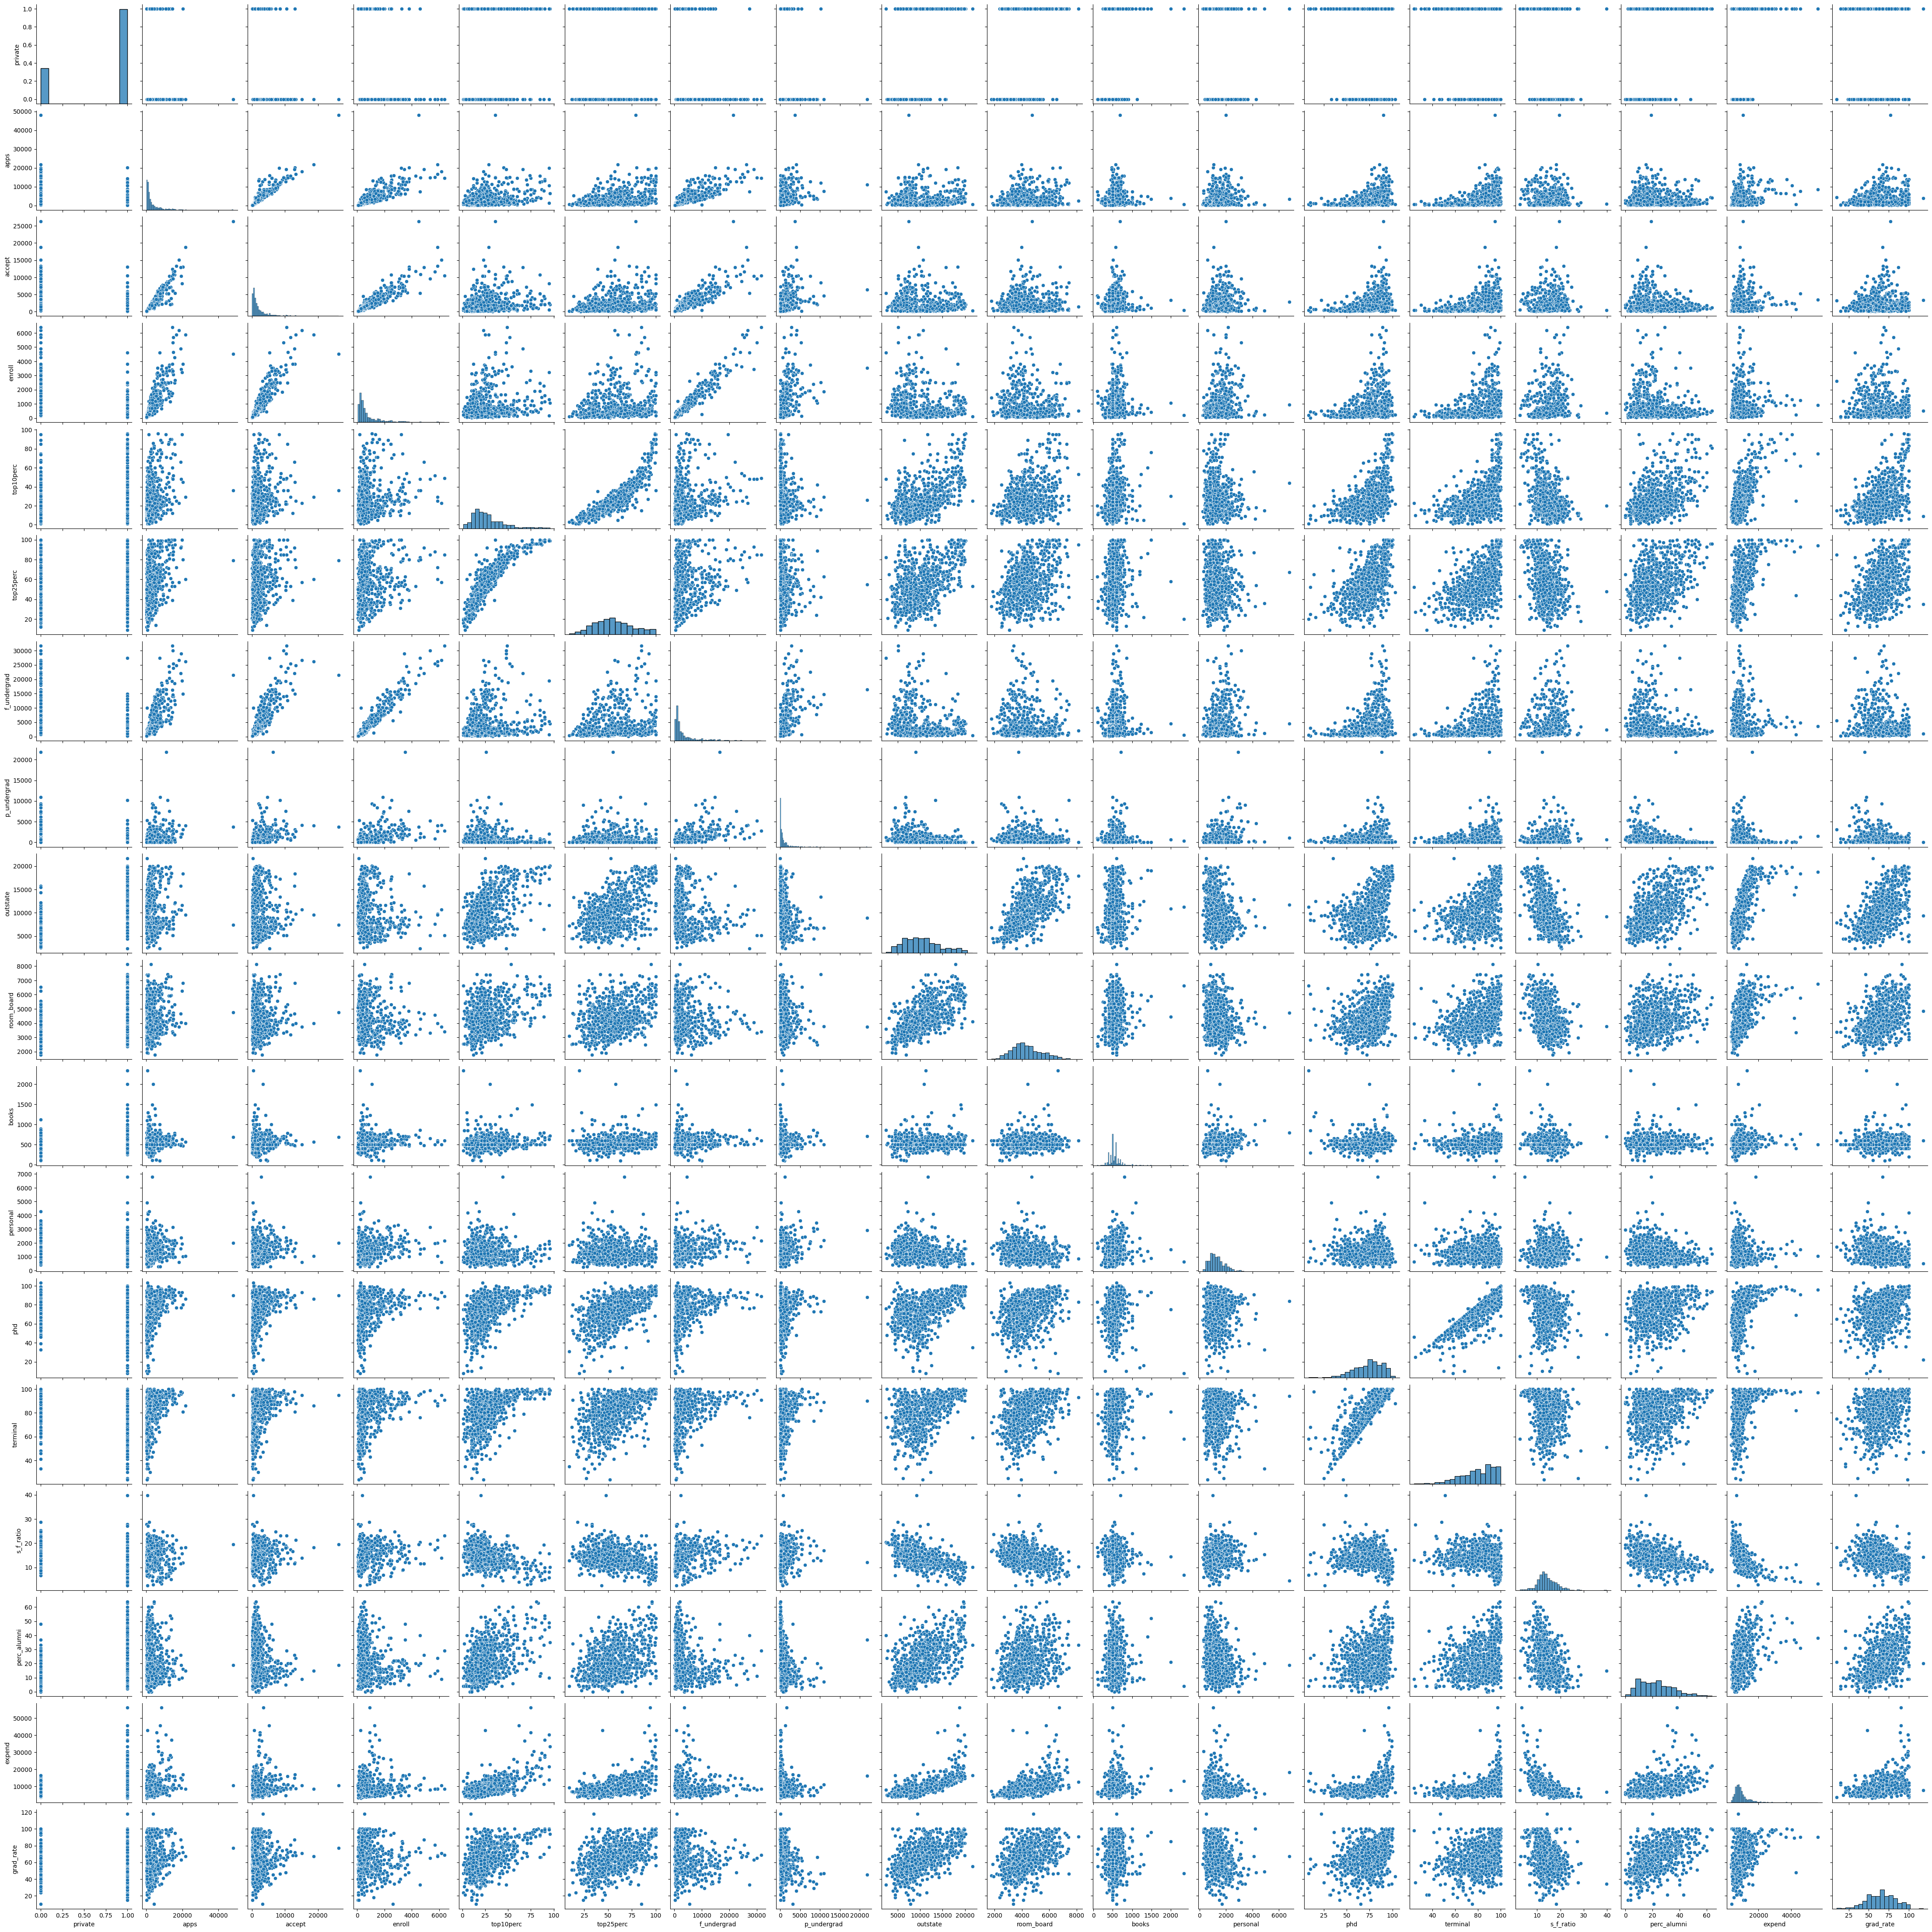

In [124]:
import seaborn as sns
sns.pairplot(df)
plt.show()

### a) Split the data set into a training set and a test set.

In [108]:
# BEGIN SOLUTION
from sklearn.model_selection import train_test_split

# Assuming 'apps' is the target variable and the rest are predictors
X = df.drop('apps', axis=1)
y = df['apps']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
df_train = pd.concat([X_train, y_train], axis=1)
# END SOLUTION

### b) Fit a linear model using least squares on the training set, and report the test error obtained.
Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [109]:
#BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
test_error = mean_squared_error(y_train, y_pred_train)
print("Training error (Mean Squared Error):", test_error)
test_error = mean_squared_error(y_test, y_pred)
print("Test error (Mean Squared Error):", test_error)



# END SOLUTION

Training error (Mean Squared Error): 1165059.1204152748
Test error (Mean Squared Error): 702493.0307555662


### c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

Link to ridge regresion : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

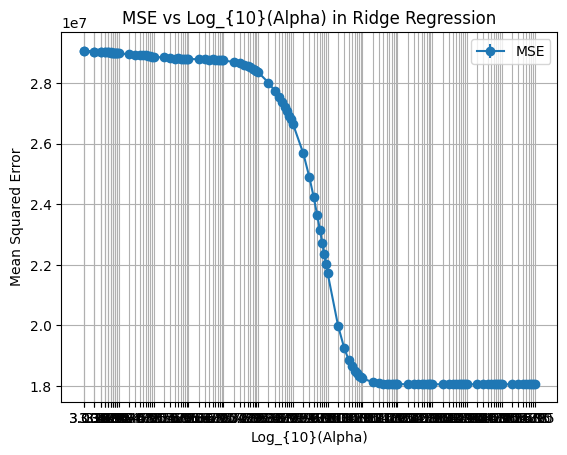

Best Alpha: 7000000000000.0
Test error (Mean Squared Error): 12988627.579563154


In [146]:
#BEGIN SOLUTION
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
np.random.seed(2)
N = df.shape[0]
# ALPHAS = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000] 
ALPHAS = [1e3, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15]
ALPHAS = [alpha * factor for alpha in ALPHAS for factor in [1, 2, 3, 4, 5, 6, 7, 8, 9]]
N_REPLICATES = 100
N_FOLDS = 10

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(ALPHAS)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    for q_idx, alpha in enumerate(ALPHAS):
        y_hat = np.zeros(N)
        for fold_idx, (train_index, test_index) in enumerate(kf.split(df_train)):
            x_train_, y_train_ = df_train.iloc[train_index].drop('apps', axis=1), df_train.iloc[train_index]['apps']
            x_test_, y_test_ = df_train.iloc[test_index].drop('apps', axis=1), df_train.iloc[test_index]['apps']
            ridge = Ridge(alpha=alpha).fit(x_train_, y_train_)
            # y_pred_train = ridgeCV.predict(x_train)
            y_pred_test = ridge.predict(x_test_)
            y_hat[test_index] = y_pred_test
        mse_estimate = np.mean((y_hat - df['apps'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

# Plot MSE vs polynomial order
plt.errorbar(np.log10(ALPHAS), mse_mean, yerr=mse_std, fmt='o-', label='MSE')
plt.xlabel('Log_{10}(Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Log_{10}(Alpha) in Ridge Regression')
plt.xticks(np.log10(ALPHAS))
plt.grid(True)
plt.legend()
plt.show()

# Find the best alpha
best_alpha_idx = np.argmin(mse_mean)
best_alpha = ALPHAS[best_alpha_idx]
print(f"Best Alpha: {best_alpha}")
ridge = Ridge(alpha=best_alpha).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("Test error (Mean Squared Error):", test_error)
# from sklearn.linear_model import RidgeCV
# ridgeCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 30, 30]).fit(x_train, y_train)
# print("Optimal alpha:", ridgeCV.alpha_)

# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score

# cvs = cross_val_score(ridgeCV, X, y, cv = 10)
# print("Mean Score:")
# print(cvs.mean(), "\n")
# print("Confidence Interval:")
# cvs.mean() - cvs.std(), cvs.mean() + cvs.std()

# END SOLUTION

In [154]:
print(ridge.coef_)
ridge2 = Ridge(alpha=0).fit(X_train, y_train)
ridge2.coef_

[-6.74396178e-08  7.97913995e-04  2.63303208e-04  2.06355367e-06
  2.26977864e-06  1.33667941e-03  2.05547302e-04  7.30109012e-05
  5.79678802e-05  7.67932592e-06  3.76471390e-05  2.15004692e-06
  1.86175603e-06  1.13508646e-07 -3.78183110e-07  4.28824770e-04
  8.35709967e-07]


array([-4.81904560e+02,  1.59783316e+00, -8.12063573e-01,  5.10457433e+01,
       -1.46920883e+01,  4.54192747e-02,  4.17649050e-02, -1.04863438e-01,
        1.67593763e-01,  7.60560838e-02,  3.12176664e-02, -1.13408877e+01,
       -3.04572408e+00,  2.12796738e+01, -2.43897917e-01,  1.00345694e-01,
        1.13128054e+01])

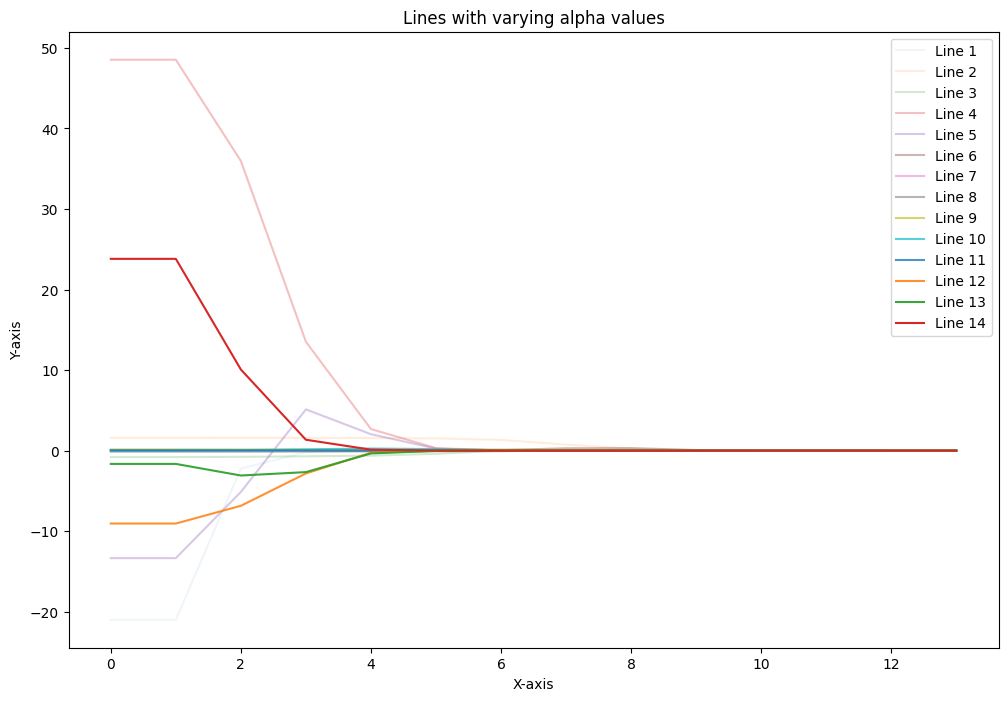

In [175]:
ALPHAS = [1e3, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15]
coefficients = []
for q_idx, alpha in enumerate(ALPHAS):
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    coefficients.append(ridge.coef_)
transposed_data = np.transpose(coefficients)
plt.figure(figsize=(12, 8)) 
for i, (x, alpha) in enumerate(zip(transposed_data, ALPHAS), 1):
    plt.plot(x, label=f'Line {i}', alpha=i/len(ALPHAS))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Lines with varying alpha values')
plt.legend()
plt.show()

### d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
 Link to lasso :https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html

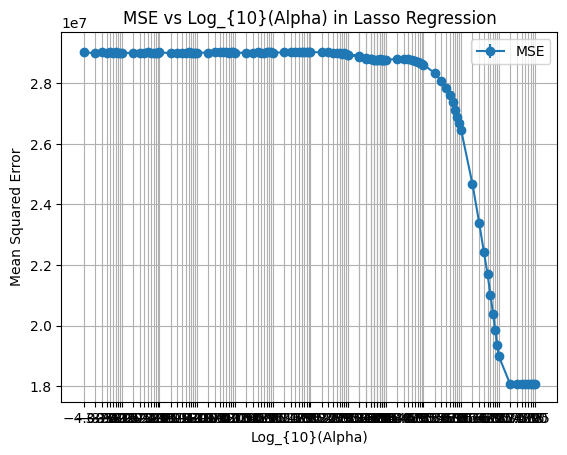

Best Alpha: 60000000.0
Test error (Mean Squared Error): 13053752.733866774


In [181]:
#BEGIN SOLUTION
#BEGIN SOLUTION
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
np.random.seed(2)
N = df.shape[0]
# ALPHAS = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000] 
ALPHAS = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e3, 1e4, 1e5, 1e6, 1e7]
ALPHAS = [alpha * factor for alpha in ALPHAS for factor in [1, 2, 3, 4, 5, 6, 7, 8, 9]]
N_REPLICATES = 100
N_FOLDS = 10

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(ALPHAS)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    for q_idx, alpha in enumerate(ALPHAS):
        y_hat = np.zeros(N)
        for fold_idx, (train_index, test_index) in enumerate(kf.split(df_train)):
            x_train_, y_train_ = df_train.iloc[train_index].drop('apps', axis=1), df_train.iloc[train_index]['apps']
            x_test_, y_test_ = df_train.iloc[test_index].drop('apps', axis=1), df_train.iloc[test_index]['apps']
            lasso = Lasso(alpha=alpha).fit(x_train_, y_train_)
            # y_pred_train = lassoCV.predict(x_train)
            y_pred_test = lasso.predict(x_test_)
            y_hat[test_index] = y_pred_test
        mse_estimate = np.mean((y_hat - df['apps'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

# Plot MSE vs polynomial order
plt.errorbar(np.log10(ALPHAS), mse_mean, yerr=mse_std, fmt='o-', label='MSE')
plt.xlabel('Log_{10}(Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Log_{10}(Alpha) in Lasso Regression')
plt.xticks(np.log10(ALPHAS))
plt.grid(True)
plt.legend()
plt.show()

# Find the best alpha
best_alpha_idx = np.argmin(mse_mean)
best_alpha = ALPHAS[best_alpha_idx]
print(f"Best Alpha: {best_alpha}")
lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("Test error (Mean Squared Error):", test_error)
# END SOLUTION

In [182]:
print(lasso.coef_)
lasso2 = Lasso(alpha=0).fit(X_train, y_train)
lasso2.coef_

[-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.]


/Users/lngeorge/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/lngeorge/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/lngeorge/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.618e+08, tolerance: 9.588e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

array([-4.81904560e+02,  1.59783316e+00, -8.12063573e-01,  5.10457433e+01,
       -1.46920883e+01,  4.54192747e-02,  4.17649050e-02, -1.04863438e-01,
        1.67593763e-01,  7.60560838e-02,  3.12176664e-02, -1.13408877e+01,
       -3.04572408e+00,  2.12796738e+01, -2.43897917e-01,  1.00345694e-01,
        1.13128054e+01])

In [183]:
non_zero_coefficients = np.sum(lasso.coef_ != 0)
non_zero_coefficients

0

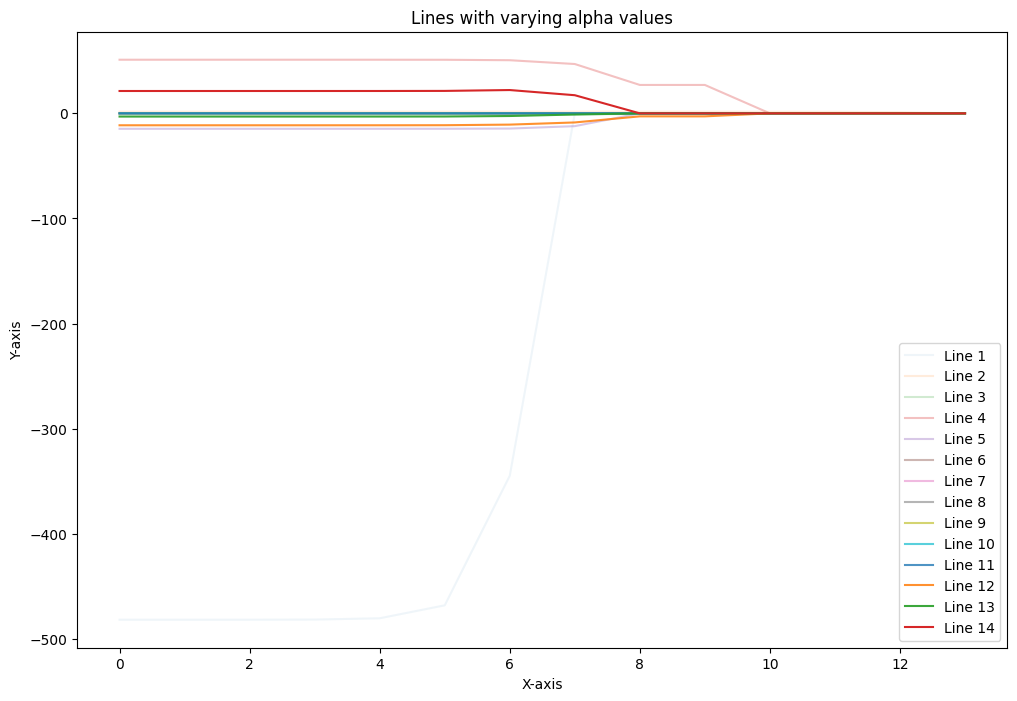

In [184]:
ALPHAS = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e3, 1e4, 1e5, 1e6, 1e7]
coefficients = []
for q_idx, alpha in enumerate(ALPHAS):
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    coefficients.append(lasso.coef_)
transposed_data = np.transpose(coefficients)
plt.figure(figsize=(12, 8)) 
for i, (x, alpha) in enumerate(zip(transposed_data, ALPHAS), 1):
    plt.plot(x, label=f'Line {i}', alpha=i/len(ALPHAS))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Lines with varying alpha values')
plt.legend()
plt.show()